In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
from scikits.bootstrap import ci
import glob
from IPython.core.display import display

# credit to http://people.duke.edu/~ccc14/pcfb/analysis.html
def bootstrap(data, num_samples, statistic, alpha=0.05):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = np.random.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])


# Artist jump distributions

In [34]:
artist_jump_data = pd.read_table('../foragingAnalysis/MPA/jumpdists',header=None,names=['userid','vals'])
arr = np.array([[int(val) for val in row.split(',')] for row in artist_jump_data['vals']])
arrmean = arr/arr.sum(1,keepdims=True).astype(float)

arr_complete = np.loadtxt('../testData/jumpdists_all',delimiter=',',dtype=int)
arrmean_complete = arr_complete/arr_complete.sum(1,keepdims=True).astype(float)

In [52]:
randhops = np.array([   4342755,    2758453,    2434669,    2270920,    2119710,
          2053161,    1994882,    1959341,    1922705,    1902292,
          1892862,    1877426,    1874080,    1863727,    1855469,
          1848940,    1858326,    1880130,    1885815,    1897211,
          1909684,    1934096,    1953835,    1976156,    2017692,
          2040944,    2055485,    2083535,    2114429,    2150651,
          2194113,    2249135,    2272474,    2325105,    2367550,
          2416719,    2462595,    2521398,    2563528,    2604849,
          2695258,    2756460,    2803823,    2894244,    2966559,
          3045459,    3137227,    3217971,    3304616,    3385290,
          3506161,    3615485,    3728882,    3852841,    3975289,
          4116962,    4259949,    4393680,    4565909,    4735030,
          4915608,    5110211,    5321315,    5547767,    5769740,
          6032796,    6311921,    6592636,    6909131,    7272314,
          7651422,    8037429,    8455876,    8947052,    9463727,
         10038245,   10639356,   11368518,   12177166,   13061866,
         13993453,   15108969,   16321222,   17704845,   19340282,
         21231830,   23451106,   26002318,   29150758,   33027899,
         37755290,   43726509,   51365877,   61696002,   76176436,
         97894469,  133221492,  199900812,  374739922, 4697838987])
randhops = randhops / float(randhops.sum())
randhops_mini = np.load('../testData/100Mrandhops.npy')

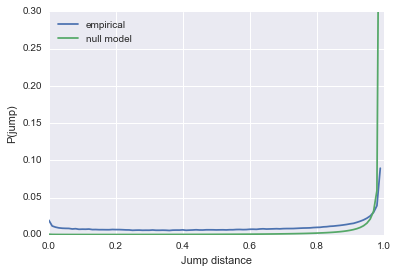

In [47]:
bins = np.arange(0,1.01,0.01)
fig,ax = plt.subplots(1,1)

ax.plot(bins[:-1],np.nanmean(arrmean,0),label='empirical')
ax.plot(bins[:-1],randhops,label='null model')
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump)')
ax.set_ylim(0,0.3)
ax.legend(loc='upper left')

In [54]:
ci_lower = []
ci_upper = []
for i in xrange(arrmean.shape[1]):
    #lower,upper = ci(arrmean[:,i],statfunction=np.nanmean,n_samples=1000)
    lower,upper = bootstrap(arrmean[:,i],statistic=np.nanmean,num_samples=1000)
    ci_lower.append(lower)
    ci_upper.append(upper)
    
ci_lower_ = []
ci_upper = []
for i in xrange(arrmean.shape[1]):
    #lower,upper = ci(arrmean[:,i],statfunction=np.nanmean,n_samples=1000)
    lower,upper = bootstrap(arrmean[:,i],statistic=np.nanmean,num_samples=1000)
    ci_lower.append(lower)
    ci_upper.append(upper)

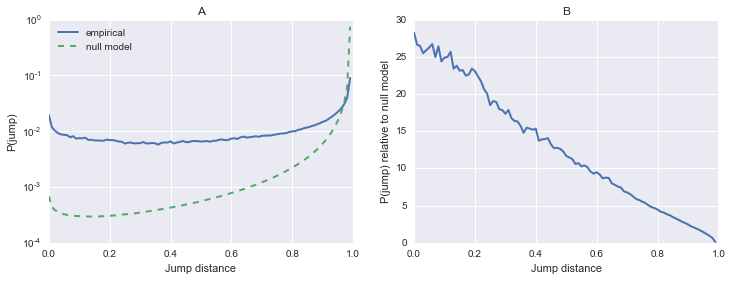

In [70]:
bins = np.arange(0,1.01,0.01)
fig,axes = plt.subplots(1,2,figsize=(12,4))
#ax.plot(bins[:-1],np.nanmean(arrmean,0)/randhops)
ax = axes[0]
ax.plot(bins[:-1],np.nanmean(arrmean,0),label='empirical',lw=2)
ax.plot(bins[:-1],randhops,label='null model',lw=2,ls='--')
#ax.fill_between(bins[:-1],np.array(ci_lower),np.array(ci_upper),alpha=0.5)
ax.set_title('A')
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump)')
#ax.set_ylim(0,0.3)
ax.set_yscale('log')
ax.legend(loc='upper left')


ax = axes[1]
ax.plot(bins[:-1],np.nanmean(arrmean_complete,0)/randhops,lw=2)
#ax.plot(bins[:-1],np.nanmean(arrmean_complete,0)/randhops_mini)
#ax.fill_between(bins[:-1],(np.nanmean(arrmean_complete,0)/randhops)-np.array(ci_lower),(np.nanmean(arrmean_complete,0)/randhops)+np.array(ci_upper),alpha=0.5)
ax.set_xlabel('Jump distance')
ax.set_ylabel('P(jump) relative to null model')
ax.set_title('B')

# Patch segmentation parameter exploration

In [6]:
df = pd.read_table('../testData/patch_len_dists_concat',header=None,names=['user','method','hist_type','dist','mpl','d'])
df['d'] = df['d'].apply(lambda d: np.array(d.split(','),dtype=float))

# drop garbage user
df = df[df['user']!=6041368]

In [7]:
len(df['user'].unique())

3071

(0, 25)

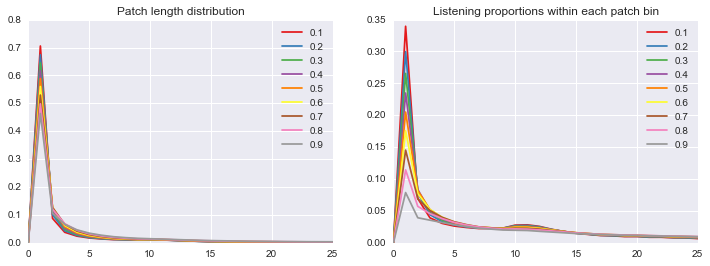

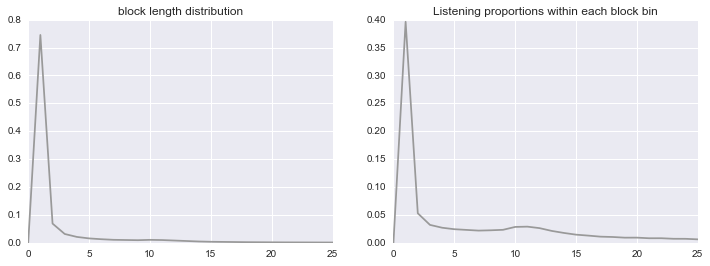

In [246]:
def grouper(df):
    result = np.zeros(1000)
    for d in df['d']:
        d = d.copy()
        
        d =  d/float(d.sum())
        result += d
    return result / float(len(df))

simple_means = df[(df['method']=='simple')&(df['hist_type']=='patches')].groupby('dist').apply(grouper)
fig,axes = plt.subplots(1,2,figsize=(12,4))
colors = seaborn.color_palette('Set1',n_colors=9)
ax = axes[0]
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_title('Patch length distribution')

ax = axes[1]
simple_means = df[(df['method']=='simple')&(df['hist_type']=='listens')].groupby('dist').apply(lambda df: df['d'].mean())
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_title('Listening proportions within each patch bin')

simple_means = df[(df['method']=='block')&(df['hist_type']=='patches')&(df['dist']==0.1)]['d'].apply(lambda x: x/x.sum()).mean()
fig,axes = plt.subplots(1,2,figsize=(12,4))
colors = seaborn.color_palette('Set1',n_colors=9)
ax = axes[0]
ax.plot(simple_means,label=dist,c=colors[i])
ax.set_title('block length distribution')

ax.set_xlim(0,25)
ax = axes[1]
simple_means = df[(df['method']=='block')&(df['hist_type']=='listens')&(df['dist']==0.1)]['d'].mean()

ax.plot(simple_means,label=dist,c=colors[i])
ax.set_title('Listening proportions within each block bin')
ax.set_xlim(0,25)

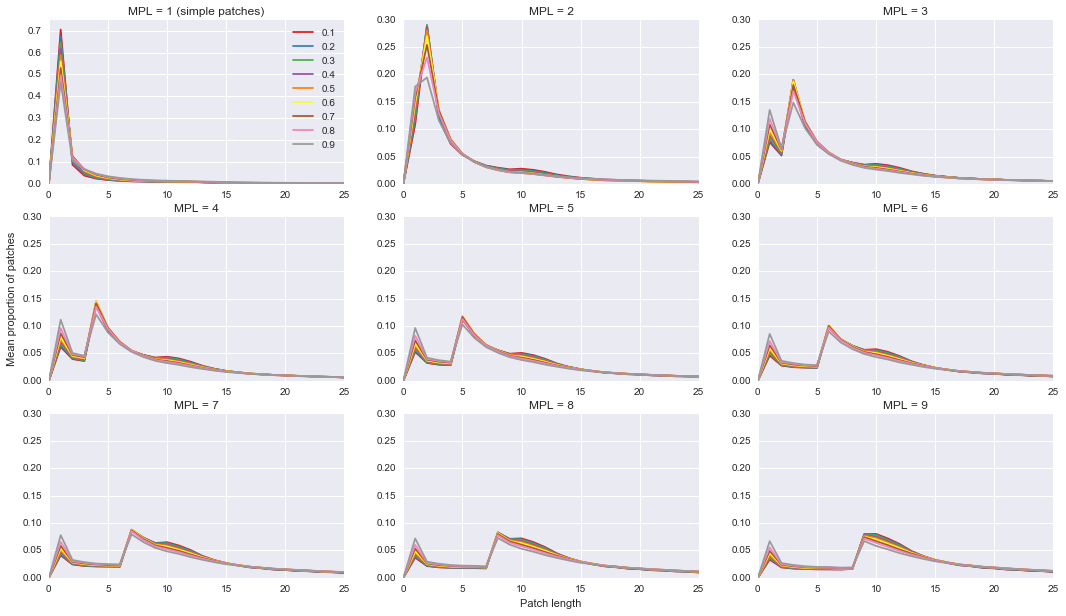

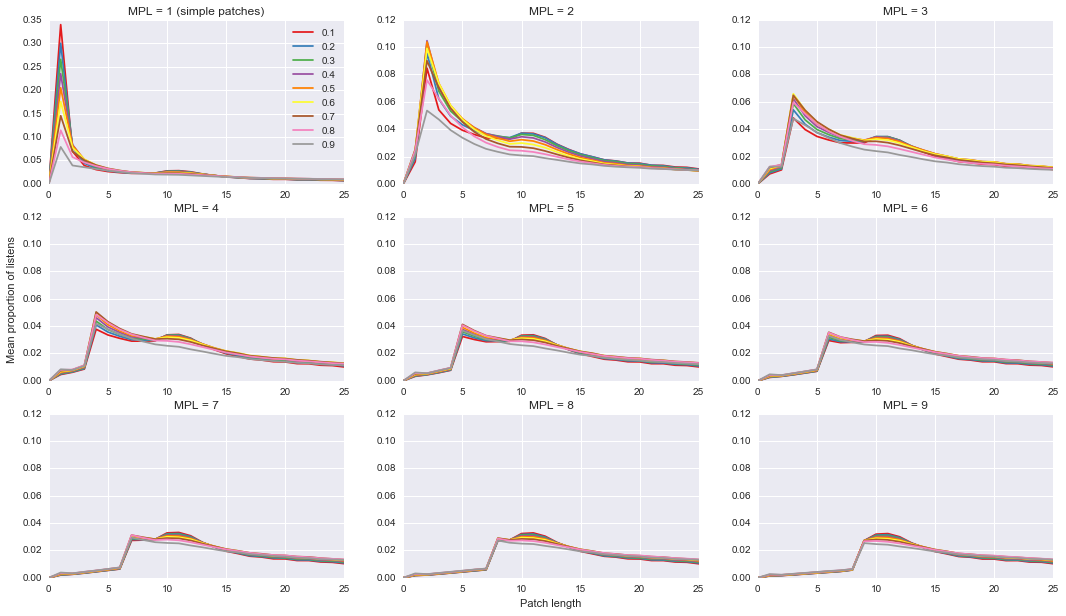

In [256]:
shuffle_means = df[(df['method']=='shuffle')&(df['hist_type']=='patches')].groupby(['dist','mpl']).apply(grouper)
fig,axes = plt.subplots(3,3,figsize=(18,10))
ax_iter = axes.flat
colors = seaborn.color_palette('Set1',n_colors=9)

simple_means = df[(df['method']=='simple')&(df['hist_type']=='patches')].groupby('dist').apply(grouper)
ax = ax_iter.next()
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_ylim(0,0.75)
ax.set_title('MPL = 1 (simple patches)')
# ax.set_xlabel('Patch length')
# ax.set_ylabel('Mean proportion of patches')

for idx,grp in enumerate(sorted(shuffle_means.index.levels[1][:-1])):
    ax = ax_iter.next()
    for i,(dist,d) in enumerate(shuffle_means.xs(grp,level='mpl').iteritems()):
        ax.plot(d,label=dist,c=colors[i])
    #ax.legend()
    ax.set_title('MPL = {}'.format(grp))
    ax.set_xlim(0,25)
    ax.set_ylim(0,0.3)
    if idx == 2:
        ax.set_ylabel('Mean proportion of patches')
    if idx == 6:
        ax.set_xlabel('Patch length')

shuffle_means = df[(df['method']=='shuffle')&(df['hist_type']=='listens')].groupby(['dist','mpl']).apply(grouper)

fig,axes = plt.subplots(3,3,figsize=(18,10))
ax_iter = axes.flat

ax = ax_iter.next()
simple_means = df[(df['method']=='simple')&(df['hist_type']=='listens')].groupby('dist').apply(lambda df: df['d'].mean())
for i,(dist,d) in enumerate(simple_means.iteritems()):
    ax.plot(d,label=dist,c=colors[i])
ax.legend()
ax.set_xlim(0,25)
ax.set_title('MPL = 1 (simple patches)')
# ax.set_xlabel('Patch length')
# ax.set_ylabel('Mean proportion of listens')



for idx,grp in enumerate(sorted(shuffle_means.index.levels[1][:-1])):
    ax = ax_iter.next()
    for i,(dist,d) in enumerate(shuffle_means.xs(grp,level='mpl').iteritems()):
        ax.plot(d,label=dist,c=colors[i])
    #ax.legend(loc='upper right')
    ax.set_title('MPL = {}'.format(grp))
    ax.set_xlim(0,25)
    ax.set_ylim(0,0.12)
    if idx == 2:
        ax.set_ylabel('Mean proportion of listens')
    if idx == 6:
        ax.set_xlabel('Patch length')
    

# ARS analysis

In [303]:
df = pd.read_table('../testData/blockdists_concat',header=None,names=['user','basis','d']).drop_duplicates(['user','basis'])

df = df[df['basis']!='D']
df2 = pd.read_table('../testData/blockdists_D_concat',header=None,names=['user','basis','d'])
df = pd.concat([df,df2])
df['d'] = df['d'].apply(lambda s: np.array(s.split(','),dtype=float))

df_random = pd.read_table('../testData/blockdists_random_concat_new',header=None,names=['user','basis','d']).drop_duplicates(['user','basis'])
df_random['d'] = df_random['d'].apply(lambda s: np.array(s.split(','),dtype=float))

In [304]:
display(df.groupby('basis').count())
display(df_random.groupby('basis').count())

,user,d
basis,,
D,85854,85854
M,85877,85877
W,85922,85922
block,91819,91819
scrobble,91879,91879


,user,d
basis,,
D,10000,10000
M,9999,9999
W,9999,9999
block,10000,10000
scrobble,10000,10000


(1, 100)

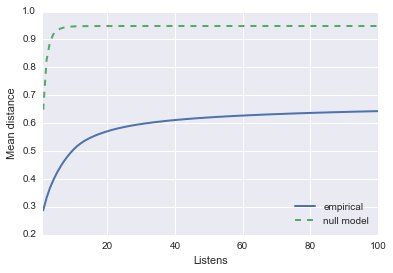

In [305]:
fig,ax = plt.subplots(1,1)
scrobbles = np.nanmean(np.vstack(df[df['basis']=='scrobble']['d'].values),axis=0)
scrobbles_rand = np.nanmean(np.vstack(df_random[df_random['basis']=='scrobble']['d'].values),axis=0)
ax.plot(np.arange(1,101,1),scrobbles,lw=2,label='empirical')
ax.plot(np.arange(1,101,1),scrobbles_rand,lw=2,ls='--',label='null model')
ax.legend(loc='lower right')
ax.set_ylabel('Mean distance')
ax.set_xlabel('Listens')
ax.set_xlim(1,len(scrobbles))

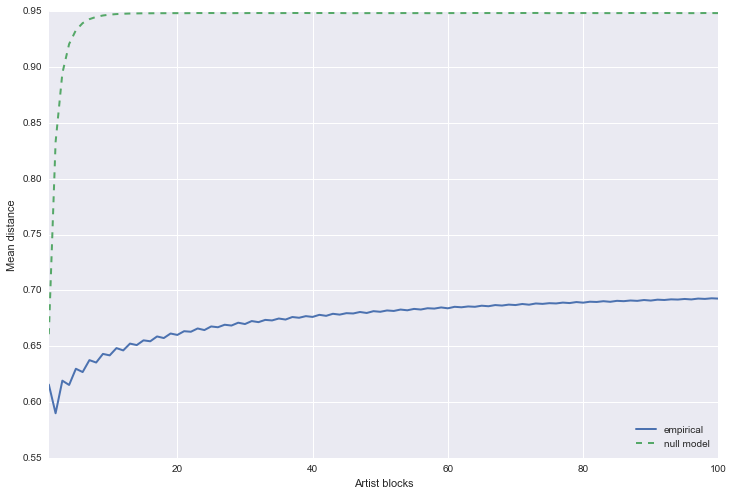

In [306]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
blocks = np.nanmean(np.vstack(df[df['basis']=='block']['d'].values),axis=0)
blocks_rand = np.nanmean(np.vstack(df_random[df_random['basis']=='block']['d'].values),axis=0)
ax.plot(np.arange(1,101,1),blocks,lw=2,label='empirical')
ax.plot(np.arange(1,101,1),blocks_rand,lw=2,ls='--',label='null model')
ax.set_ylabel('Mean distance')
ax.set_xlabel('Artist blocks')
ax.set_xlim(1,len(blocks))
ax.legend(loc='lower right')

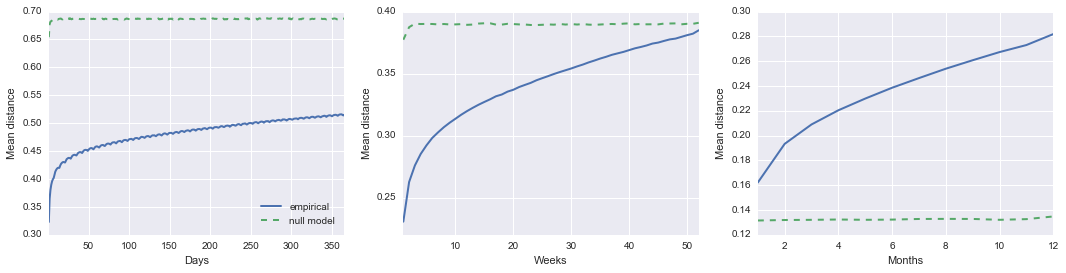

In [307]:
fig,axes = plt.subplots(1,3,figsize=(18,4))
#fig,ax = plt.subplots(1,1,figsize=(12,8))
for i,basis in enumerate(['D','W','M']):
    blocks = np.nanmean(np.vstack(df[df['basis']==basis]['d'].values),axis=0)
    blocks_rand = np.nanmean(np.vstack(df_random[df_random['basis']==basis]['d'].values),axis=0)
    ax = axes[i]
    ax.plot(np.arange(1,len(blocks)+1,1),blocks,lw=2,label='empirical')
    ax.plot(np.arange(1,len(blocks_rand)+1,1),blocks_rand,lw=2,label='null model',ls='--')
    ax.set_ylabel('Mean distance')
    ax.set_xlabel({'D':'Days','W':'Weeks','M':'Months'}[basis])
    ax.set_xlim(1,len(blocks))
    if i ==0:
        ax.legend(loc='lower right')
    #ax.set_ylim(0,1)
    #ax.set_xticks(np.arange(0,98,7))

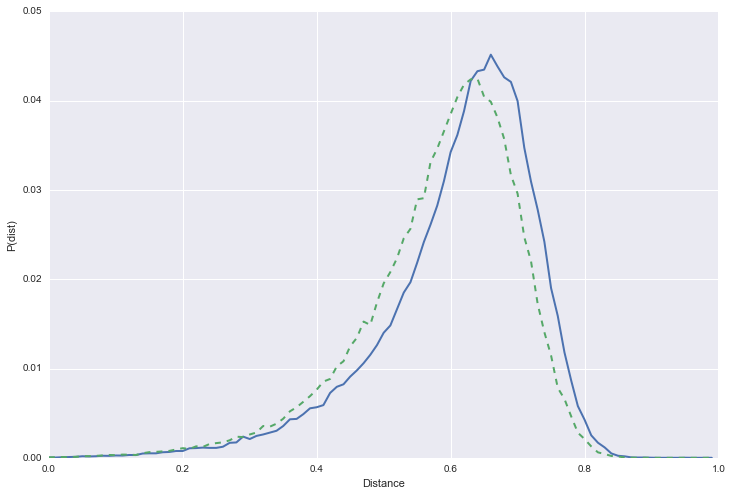

In [275]:
### Comparison of block0-block1 and block0-block2 distance distributions
arr = np.vstack(df[df['basis']=='block']['d'].values)
fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,1.01,0.01)
vals,toss = np.histogram(arr[:,0],bins=bins)
ax.plot(bins[:-1],vals/float(vals.sum()),label="Block0-Block1 distance",lw=2)
vals,toss = np.histogram(arr[:,1],bins=bins)
ax.plot(bins[:-1],vals/float(vals.sum()),label="Block0-Block2 distance",lw=2,ls='--')
ax.set_xlabel('Distance')
ax.set_ylabel('P(dist)')

In [277]:
# patch-based analyses 

df = pd.read_table('../testData/patch_blockdists_concat',header=None,names=['user','basis','d']).drop_duplicates(['user','basis'])
df['d'] = df['d'].apply(lambda s: np.array(s.split(','),dtype=float))
print len(df['user'].unique())

84528


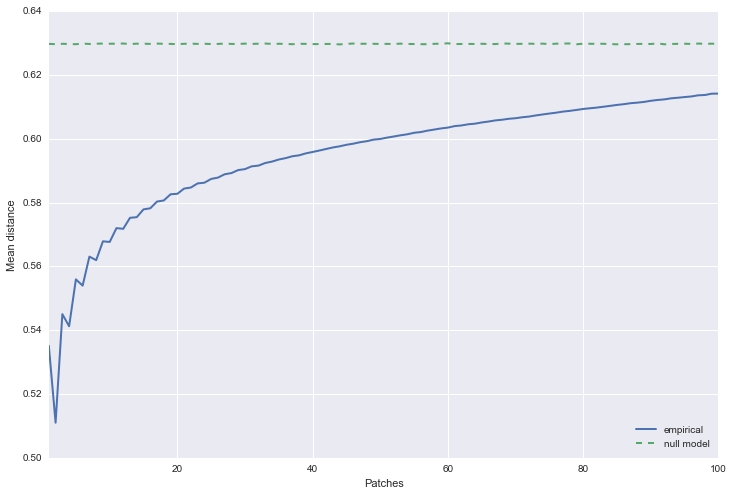

In [278]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
blocks = np.nanmean(np.vstack(df[df['basis']=='patch']['d'].values),axis=0)
blocks_rand = np.nanmean(np.vstack(df[df['basis']=='patch_random']['d'].values),axis=0)
ax.plot(np.arange(1,101,1),blocks,lw=2,label='empirical')
ax.plot(np.arange(1,101,1),blocks_rand,lw=2,ls='--',label='null model')
ax.set_ylabel('Mean distance')
ax.set_xlabel('Patches')
ax.set_xlim(1,len(blocks))
ax.legend(loc='lower right')

# Patch diversity distributions

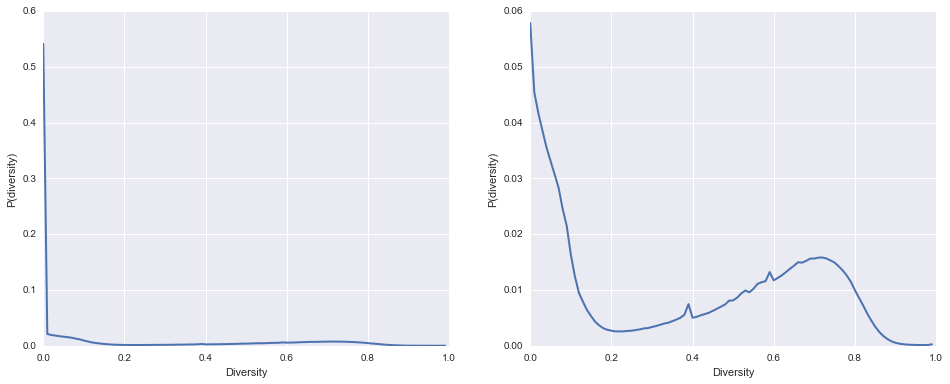

In [276]:
df = pd.read_table('../testData/diversity_concat',header=None,names=['user','basis','d']).drop_duplicates(['user','basis'])
df['d'] = df['d'].apply(lambda s: np.array(s.split(','),dtype=float))
bins = np.arange(0,1.01,.01)

fig,axes = plt.subplots(1,2,figsize=(16,6))
zeros = np.nanmean(np.vstack(df[df['basis']=='zeros']['d'].values),axis=0)
nozeros = np.nanmean(np.vstack(df[df['basis']=='nozeros']['d'].values),axis=0)

axes[0].plot(zeros,lw=2,label='including zeros')
#axes[0].set_yscale('log')
axes[1].plot(nozeros,lw=2,ls='-',label='excluding zeros')
for ax in axes:
    ax.set_ylabel('P(diversity)')
    ax.set_xlabel('Diversity')
    ax.set_xlim(1,len(blocks))
    ax.set_xticks(np.arange(0,101,20))
    ax.set_xticklabels(np.arange(0,1.01,.2))
#axes[0].legend(loc='upper right')

# Gap analysis (artist level)

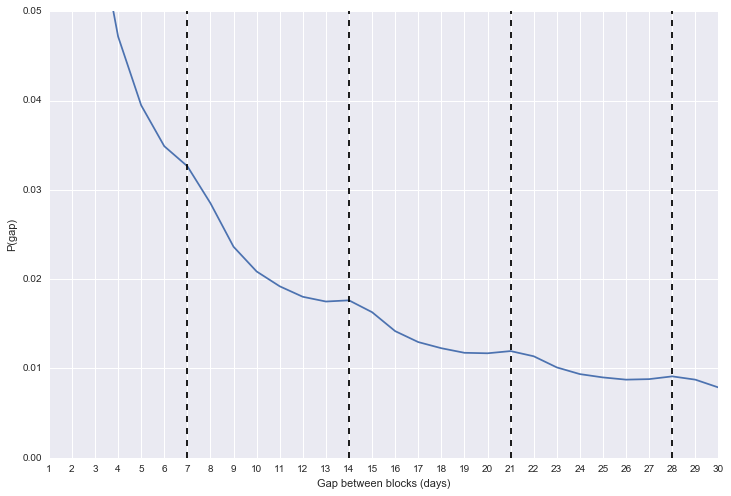

In [182]:
# import pandas as pd
# import numpy as np
# df = pd.read_table('test',header=None,names=['user','d']).drop_duplicates(['user'])
# df['d'] = df['d'].apply(lambda s: np.array(s.split(','),dtype=float))
# result = np.nanmean(np.vstack(df['d']),axis=0)
# result

x=np.array([ 0.3724982 ,  0.09270428,  0.06095183,  0.04718468,  0.03947697,
        0.03489556,  0.03265157,  0.02851   ,  0.02363414,  0.02086439,
        0.01920391,  0.01802927,  0.01749849,  0.01763104,  0.01630397,
        0.01418248,  0.01295734,  0.01226865,  0.01175618,  0.01170099,
        0.0119483 ,  0.01136754,  0.0101201 ,  0.0093693 ,  0.00899711,
        0.00874891,  0.0088069 ,  0.00911558,  0.00874766,  0.00787465])

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_xticks(range(31))
ax.set_xticklabels(range(1,31))
ax.plot(x)
ax.set_ylim(0,0.05)
for y in (6,13,20,27):
    ax.axvline(y,ls='--',c='k')
ax.set_xlabel('Gap between blocks (days)')
ax.set_ylabel('P(gap)');


# Gap analysis (scrobble level)

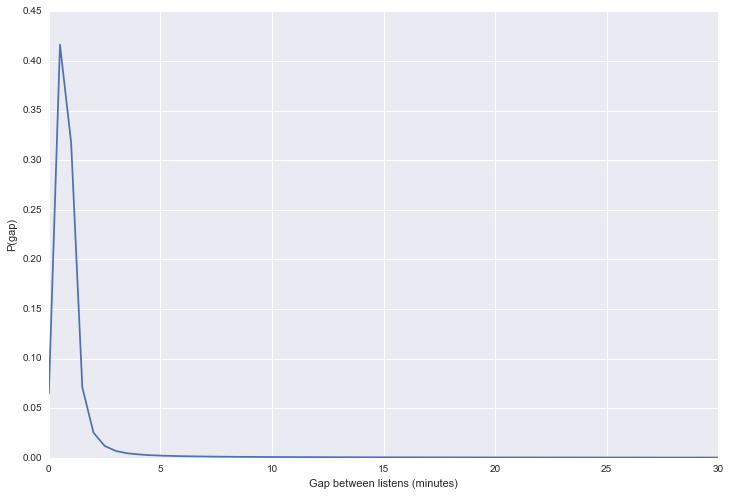

In [245]:
# import numpy as np
# arr = np.loadtxt('scrobble_td_concat_nouser',delimiter=',',dtype=float)
# result = np.nanmean(arr,axis=0)
# np.save('/home/jlorince/scrobble_td.npy',result)

x=np.load('../testData/scrobble_td.npy')
#x = pd.Series(x).cumsum()

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(x)
ax.set_xlim(0,60)
ax.set_xticks(np.arange(0,61,10))
ax.set_xticklabels(np.arange(0,31,5))
# for y in (6,13,20,27):
#     ax.axvline(y,ls='--',c='k')
ax.set_xlabel('Gap between listens (minutes)')
ax.set_ylabel('P(gap)');



# Regression to mean example

In [261]:
# import numpy as np
# import pandas as pd
# from glob import glob
# from scipy.spatial.distance import cosine

# features = np.load('/home/jlorince/lda_tests_artists/features_190.npy' )
# features = {i:features[i] for i in xrange(len(features))}
def get_features(idx):
    return features.get(idx,np.repeat(np.nan,190))

def cos_nan(arr1,arr2):
    if np.any(np.isnan(arr1)) or np.any(np.isnan(arr2)):
        return np.nan
    else:
        return cosine(arr1,arr2)

vals_D = np.zeros(100)
vals_W = np.zeros(100)
vals_M = np.zeros(100)
for i,f in enumerate(glob('/home/jlorince/random_seqs/*')):
    df = pd.read_pickle(f)
    df['features'] = df['artist_idx'].apply(lambda idx: get_features(idx))
    for method in ('D','W','M'): 
#         blocks = df.set_index('ts')['features'].resample(method).aggregate(lambda ser: np.nanmean(np.vstack(ser.values),axis=0) if len(ser)>0 else np.repeat(np.nan,190))
#         pdists = pdist(np.vstack(blocks),metric='cosine')
#         vals = np.histogram(pdists[~np.isnan(pdists)],bins=np.arange(0,1.01,.01))[0]
#         vals = vals / float(vals.sum())
        blocks = df.set_index('ts')['features'].resample(method).aggregate(lambda ser: np.nanmean(np.vstack(ser.values),axis=0) if len(ser)>0 else np.repeat(np.nan,190))
        blocks = pd.DataFrame({'centroid':blocks})
        blocks['prev'] = blocks.shift(1)
        vals = np.histogram(blocks.apply(lambda row: cos_nan(row['centroid'],row['prev']),axis=1).dropna(),bins=np.arange(0,1.01,.01))[0]
        vals = vals / float(vals.sum())
        vars()['vals_{}'.format(method)] += vals
    print 'file {} complete ({} done)'.format(f,i+1)


vals_D = np.array([ 0.0669407 ,  0.03795266,  0.02931419,  0.02712854,  0.02383287,
        0.02428629,  0.02147838,  0.01947445,  0.01921268,  0.01825342,
        0.01716436,  0.01732134,  0.01617748,  0.0141959 ,  0.01475098,
        0.01434984,  0.01457545,  0.01430141,  0.01420879,  0.01259708,
        0.01248534,  0.0122092 ,  0.01241912,  0.01158376,  0.01100065,
        0.01123365,  0.01138699,  0.01010199,  0.0109853 ,  0.01025733,
        0.01022018,  0.0111647 ,  0.01000232,  0.00888953,  0.01068118,
        0.00893994,  0.00972406,  0.00856009,  0.00917681,  0.00952468,
        0.01002546,  0.00799705,  0.00727188,  0.00833185,  0.00740424,
        0.00765273,  0.00740022,  0.00746697,  0.00690902,  0.00773268,
        0.00633688,  0.00676773,  0.00686437,  0.00642552,  0.00723111,
        0.00566749,  0.00631888,  0.0067123 ,  0.00652771,  0.00600319,
        0.00545128,  0.00579941,  0.00601135,  0.00588808,  0.00613836,
        0.00554106,  0.00528791,  0.00502949,  0.00520052,  0.00546227,
        0.00457573,  0.00570661,  0.00511445,  0.00504449,  0.0048957 ,
        0.00474209,  0.00508125,  0.00440935,  0.00436496,  0.00452327,
        0.00467495,  0.00480481,  0.00383038,  0.00504464,  0.00417325,
        0.00413876,  0.004065  ,  0.00429174,  0.00405481,  0.00387718,
        0.00491528,  0.00405331,  0.00423671,  0.00543709,  0.00450095,
        0.00519902,  0.0041103 ,  0.00451511,  0.00592428,  0.00942807])


vals_W = np.array([ 0.07333956,  0.05827738,  0.04639731,  0.04204516,  0.03811236,
        0.03204711,  0.0298483 ,  0.0311877 ,  0.02476462,  0.02700225,
        0.02340788,  0.02299939,  0.02231626,  0.02057147,  0.02136248,
        0.01815783,  0.01529607,  0.01971827,  0.01589424,  0.01652363,
        0.01250862,  0.01572295,  0.01224213,  0.01437179,  0.01105796,
        0.01181666,  0.01077189,  0.00896291,  0.01025785,  0.00884746,
        0.00922401,  0.00821746,  0.00864947,  0.00705955,  0.00830302,
        0.00858454,  0.00678864,  0.00759968,  0.007565  ,  0.00590007,
        0.00806254,  0.0056025 ,  0.00578737,  0.00513463,  0.00520558,
        0.00451618,  0.0064639 ,  0.00378487,  0.00457699,  0.00473037,
        0.00448263,  0.00479338,  0.00420176,  0.00395284,  0.00408119,
        0.00396066,  0.0047551 ,  0.00390559,  0.00350289,  0.00330573,
        0.00362058,  0.00478196,  0.00467005,  0.00318729,  0.0029746 ,
        0.00310437,  0.00294908,  0.00233347,  0.00193665,  0.00272735,
        0.00230949,  0.00194491,  0.00242395,  0.00256545,  0.00284312,
        0.00256849,  0.00298683,  0.00188206,  0.00300451,  0.00250546,
        0.00190094,  0.00137693,  0.0018164 ,  0.00217584,  0.00261521,
        0.00203851,  0.00210212,  0.00161997,  0.00198227,  0.00220062,
        0.00338718,  0.00178124,  0.00252137,  0.00173998,  0.00224881,
        0.00228201,  0.00281581,  0.00157307,  0.00225762,  0.00437096])

vals_M = np.array([ 0.09767873,  0.07727021,  0.0656259 ,  0.05737605,  0.0493591 ,
        0.04651368,  0.04524877,  0.04027672,  0.03416795,  0.02630164,
        0.02733073,  0.02445379,  0.019053  ,  0.02274933,  0.02056719,
        0.02065471,  0.01646024,  0.01023617,  0.01234902,  0.01158043,
        0.01014458,  0.00880049,  0.01086173,  0.01012777,  0.0110771 ,
        0.01039156,  0.00639856,  0.00712464,  0.00849975,  0.00543674,
        0.00469928,  0.00678664,  0.00314687,  0.00663304,  0.00861815,
        0.0063477 ,  0.00519389,  0.00624674,  0.0024136 ,  0.00655541,
        0.00368571,  0.0058434 ,  0.00343761,  0.00532036,  0.00416757,
        0.00278186,  0.00444917,  0.00515012,  0.0025483 ,  0.00416408,
        0.00228085,  0.00363306,  0.00142029,  0.0033639 ,  0.00316743,
        0.00135523,  0.00249747,  0.00246813,  0.00120801,  0.00297668,
        0.00197112,  0.00229399,  0.0044859 ,  0.00180271,  0.00135997,
        0.00126602,  0.00216332,  0.00247987,  0.00047373,  0.00152483,
        0.00193969,  0.00321782,  0.00056439,  0.00036146,  0.00050363,
        0.00046601,  0.00050363,  0.00072005,  0.00216312,  0.001481  ,
        0.00151206,  0.00010995,  0.00289416,  0.00148433,  0.00105251,
        0.00121041,  0.00110147,  0.00200388,  0.00045988,  0.00016396,
        0.00036157,  0.0007735 ,  0.00088148,  0.00078017,  0.0021467 ,
        0.00065915,  0.00111944,  0.00151784,  0.00029615,  0.00170655])

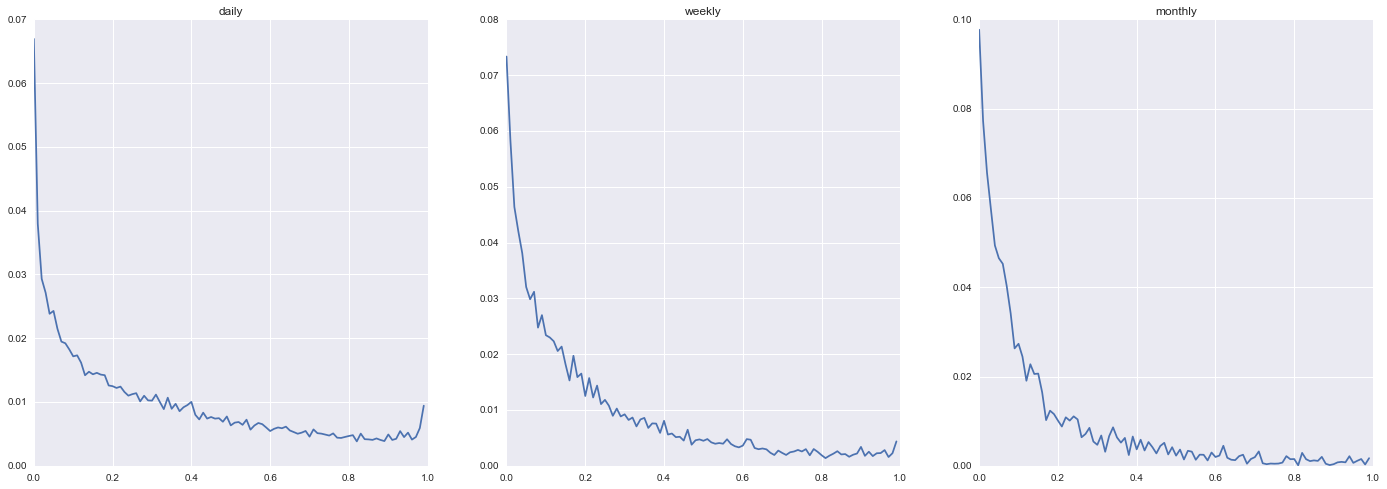

In [262]:
fig,axes = plt.subplots(1,3,figsize=(24,8))
for i,arr in enumerate((vals_D,vals_W,vals_M)):
    ax = axes[i]
    ax.plot(arr)
    ax.set_xticklabels(np.arange(0,1.01,.2))
axes[0].set_title('daily')
axes[1].set_title('weekly')
axes[2].set_title('monthly');